In [1]:
import collections
import pandas as pd
from glob import glob
import os
import math
from bioat.lib.libcircos import Garc, Gcircle, table_hg38_chromosome_length, table_hg38_cytoband
from bioat.lib.libcolor import plot_colortable
import matplotlib.pyplot as plt

pd.set_option("max_colwidth", 40)  # column最大宽度
pd.set_option("display.width", 120)  # dataframe宽度
pd.set_option("display.max_columns", None)  # column最大显示数
pd.set_option("display.max_rows", 50)  # row最大显示数

# Global analysis

## circos plot

In [2]:
# resources
url = "https://raw.githubusercontent.com/hermanzhaozzzz/bioat/master/data/circos"

### 辅助函数

#### plot_colortable

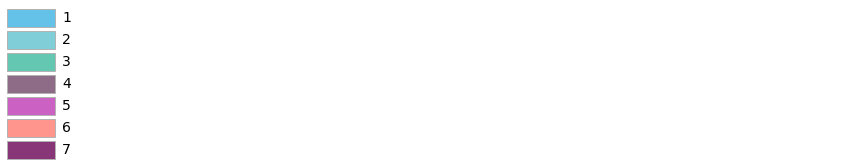

In [3]:
# %% function for legend
# %%% test func plot_colortable
colors = ['#64C1E8',
          '#80CED7',
          '#63C7B2',
          '#8E6C88',
          '#CA61C3',
          '#FF958C',
          '#883677']
g = plot_colortable(colors, ncols=1, labels=[1, 2, 3, 4, 5, 6, 7])
# g

#### gcircle_add_garc

In [4]:
def gcircle_add_garc(x):
    arc = Garc(
        arc_id=x['chr'], size=x['end'], interspace=1, raxis_range=(920, 950), 
        labelposition=40, label_visible=True, facecolor='#FFFFFF'
    )
    circle.add_garc(arc)

### table
#### chromosomes

In [5]:
df_chrom = table_hg38_chromosome_length()
df_chrom = df_chrom[df_chrom['chr'].map(lambda x: x not in ['chrY', 'chrM'])].copy()
df_chrom

,chr,start,end
0,chr1,1,249250621
1,chr2,1,243199373
2,chr3,1,198022430
3,chr4,1,191154276
4,chr5,1,180915260
5,chr6,1,171115067
6,chr7,1,159138663
7,chr8,1,146364022
8,chr9,1,141213431
9,chr10,1,135534747


#### cytoBand

In [6]:
df_cytoband = table_hg38_cytoband()
df_cytoband = df_cytoband[df_cytoband['chr'].map(lambda x: x not in ['chrY', 'chrM'])].copy()
df_cytoband['name'] = df_cytoband['chr']
df_cytoband['start'] = df_cytoband['start'] - 1
df_cytoband['width'] = df_cytoband['end'] - df_cytoband['start']
df_cytoband

,chr,start,end,value1,value2,name,width
0,chr1,-1,2300000,p36.33,gneg,chr1,2300001
1,chr1,2299999,5300000,p36.32,gpos25,chr1,3000001
2,chr1,5299999,7100000,p36.31,gneg,chr1,1800001
3,chr1,7099999,9100000,p36.23,gpos25,chr1,2000001
4,chr1,9099999,12500000,p36.22,gneg,chr1,3400001
...,...,...,...,...,...,...,...
846,chrX,134499999,138900000,q26.3,gneg,chrX,4400001
847,chrX,138899999,141200000,q27.1,gpos75,chrX,2300001
848,chrX,141199999,143000000,q27.2,gneg,chrX,1800001
849,chrX,142999999,148000000,q27.3,gpos100,chrX,5000001


#### points

In [7]:
# sort_keys = df_points.groupby('<sample>').count().sort_values(by='chr', ascending=False).index
sort_keys = ['DetectSeq_SIRT6-DddA11_REP-1', 'DetectSeq_SIRT6-DddA11_REP-2',
             'DetectSeq_JAK2-DddA11_REP-1', 'DetectSeq_JAK2-DddA11_REP-2',
             'DetectSeq_ATP8-DddA11_REP-1', 'DetectSeq_ATP8-DddA6_REP-1', 'DetectSeq_ATP8-DddAwt_REP-1']
colors = ['#64C1E8',
          '#80CED7',
          '#5AB4C8',
          '#78C8C8',
          '#FF958C',
          '#D7BFF8',
          '#F8EDD0']
df_points = pd.read_csv('../final_list_after_igv_check/2023-04-24_merged_final_list_add_header_poisson_result.csv',
                        usecols=['<sample>', 'chr_name', 'region_start', 'region_end', 'treat_mut_count.norm'])
df_points.columns = ['<sample>', 'chr', 'start', 'end', 'value1']
df_points = df_points[df_points['chr'].map(lambda x: x not in ['chrY', 'chrM'])].copy()
df_points['log10_value'] = df_points['value1'].map(math.log10)
df_points

,<sample>,chr,start,end,value1,log10_value
0,DetectSeq_ATP8-DddA11_REP-1,chr11,28107123,28107196,0.113256,-0.945938
1,DetectSeq_ATP8-DddA11_REP-1,chr4,127523472,127523528,0.125178,-0.902473
2,DetectSeq_ATP8-DddA11_REP-1,chr10,79996559,79996604,0.095374,-1.020572
3,DetectSeq_ATP8-DddA11_REP-1,chr20,36808712,36808741,0.089413,-1.048601
4,DetectSeq_ATP8-DddA11_REP-1,chr9,115952242,115952303,0.095374,-1.020572
...,...,...,...,...,...,...
15392,DetectSeq_SIRT6-DddA11_REP-2,chr1,148725246,148725266,0.060375,-1.219144
15393,DetectSeq_SIRT6-DddA11_REP-2,chr8,81158725,81158758,0.069663,-1.156996
15394,DetectSeq_SIRT6-DddA11_REP-2,chr8,100191816,100191830,0.060375,-1.219144
15395,DetectSeq_SIRT6-DddA11_REP-2,chr17,32831978,32831991,0.097529,-1.010868


### plot

#### plot chromosomes

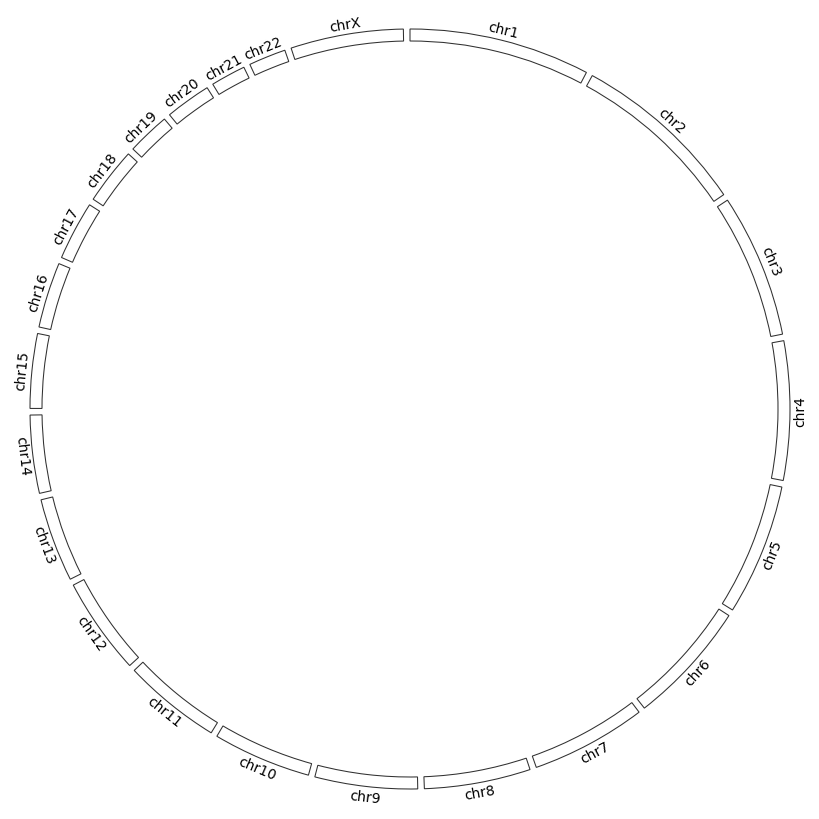

In [8]:
# 实例化一个Gcircle对象
circle = Gcircle()
df_chrom.apply(gcircle_add_garc, axis=1)
circle.set_garcs()
# circle.figure;

#### plot cytoband

- cytoband 染色体带: 处于中期的细胞染色体上形成的用于识别特定染色体的带型

In [9]:
df_cytoband.head()

,chr,start,end,value1,value2,name,width
0,chr1,-1,2300000,p36.33,gneg,chr1,2300001
1,chr1,2299999,5300000,p36.32,gpos25,chr1,3000001
2,chr1,5299999,7100000,p36.31,gneg,chr1,1800001
3,chr1,7099999,9100000,p36.23,gpos25,chr1,2000001
4,chr1,9099999,12500000,p36.22,gneg,chr1,3400001


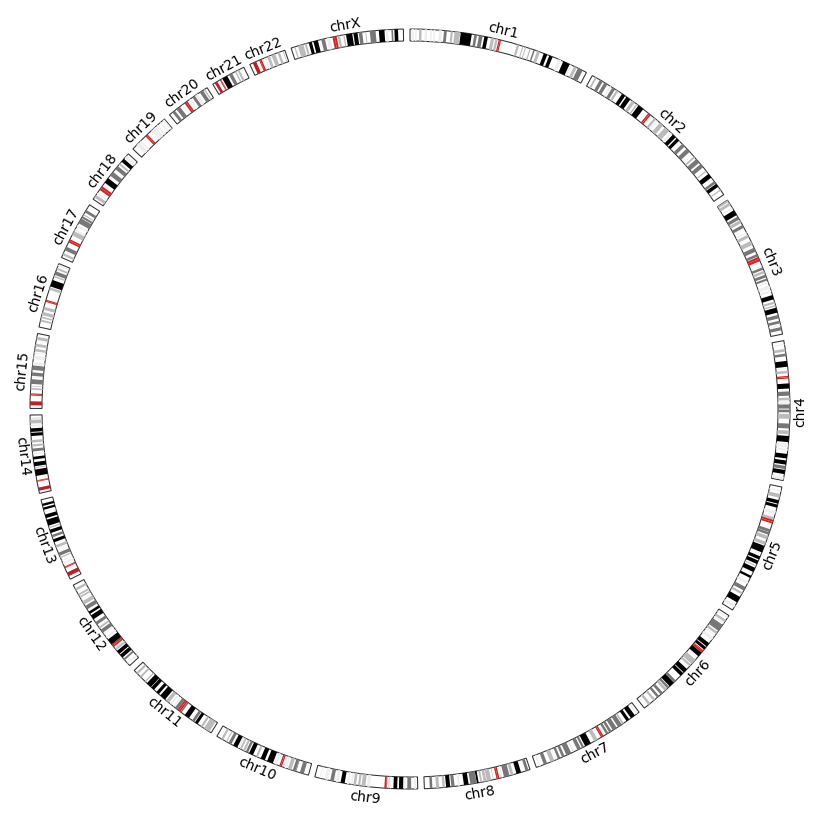

In [11]:
color_dict = {"gneg":"#FFFFFF00", "gpos25":"#EEEEEE", "gpos50":"#BBBBBB", "gpos75":"#777777",
              "gpos100":"#000000", "gvar":"#FFFFFF00", "stalk":"#C01E27", "acen":"#D82322"}
arcdata_dict = collections.defaultdict(dict)

for idx, line in df_cytoband.iterrows():
    # print(line)
    name = line['name']
    start = line['start']
    width = line['width']
    cyto = line['value2']
    
    
    if name not in arcdata_dict:
        arcdata_dict[name]["positions"] = []
        arcdata_dict[name]["widths"] = []
        arcdata_dict[name]["colors"] = []
    arcdata_dict[name]["positions"].append(start)
    arcdata_dict[name]["widths"].append(width)
    arcdata_dict[name]["colors"].append(color_dict[cyto])

for key in arcdata_dict:
    circle.barplot(key, data=[1] * len(arcdata_dict[key]["positions"]), positions=arcdata_dict[key]["positions"],
                   width=arcdata_dict[key]["widths"], raxis_range=[920, 950], facecolor=arcdata_dict[key]["colors"])

circle.figure

#### plot point

[795, 915]
[675, 795]
[555, 675]
[435, 555]
[315, 435]
[195, 315]
[75, 195]


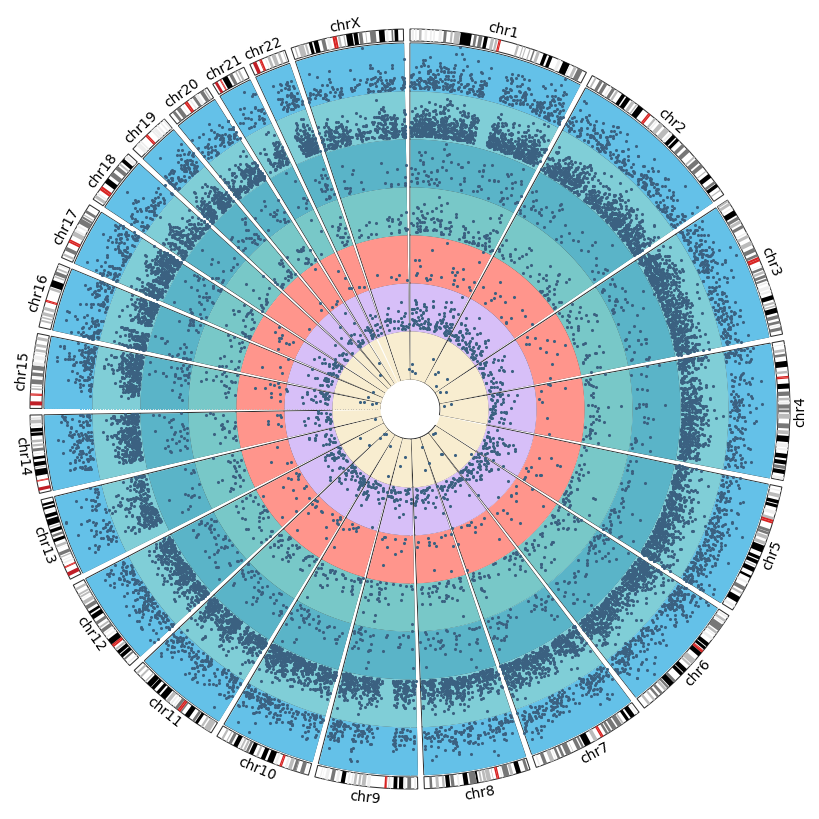

In [12]:
# %%% scatter plot  1s per 1k rows
color_dict = {"gneg":"#FFFFFF00", "gpos25":"#EEEEEE", "gpos50":"#BBBBBB", "gpos75":"#777777", 
              "gpos100":"#000000", "gvar":"#FFFFFF00", "stalk":"#C01E27", "acen":"#D82322"}
keys_colors = list(zip(sort_keys, colors))
raxis_range = [915, 1035]

for sort_key, color in keys_colors:
    df = df_points.query('`<sample>`==@sort_key')
    df = df.copy()

    df['pos'] = raxis_range[1] - raxis_range[0]
    raxis_range[0] = raxis_range[0] - 120
    raxis_range[1] = raxis_range[1] - 120
    print(raxis_range)
    vmin = df['log10_value'].min()
    vmax = df['log10_value'].max()

    for idx, point in df_chrom.iterrows():  # 考虑把它放外头
        circle.fillplot(
            point['chr'],
            data=df['pos'],
            # data=[raxis_range[1] - raxis_range[0]],
            rlim=[0, raxis_range[1] - raxis_range[0]],
            raxis_range=raxis_range,
            facecolor=color,
            edgecolor='white'
        )

    for chrom, point in df.groupby('chr'):
        # print(point)
        # print(color)

        circle.scatterplot(
            chrom,
            data=point['log10_value'],
            positions=(point['start'] + point['end']) / 2,
            rlim=[vmin - 0.05 * abs(vmin), vmax + 0.05 * abs(vmax)],
            raxis_range=raxis_range,
            facecolor="#3B6181",
            # edgecolor='black',
            spine=True,
            markersize=5
        )

circle.figure

In [13]:
# %%% save fig 1s per 1k rows
# !pwd
circle.figure.savefig("../pycircos/project_out.pdf", dpi=300)

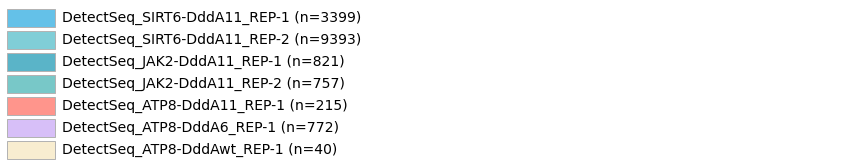

In [14]:
# %%% plot legend
df_sort_keys = pd.DataFrame(sort_keys, columns=['<sample>'])
df_sort_values = df_points.groupby('<sample>').count()['chr'].reset_index()
labels = pd.merge(df_sort_keys, df_sort_values).apply(
    lambda x: f'{x["<sample>"]} (n={x["chr"]})', axis=1
)

plot_colortable(colors=colors, ncols=1, labels=labels.tolist())
plt.savefig("../pycircos/project_out_legend.pdf")

## classification for TAS-dependent and TAS-independent off-target

### get art files

```bash
# 使用TALE的左右两边的序列来align
# 拿到align后的art file
# plot art生成pdf
/gpfs/user/zhaohuanan/3.project/2022_DdCBE-3D-Genome_topic/2022-09-30_Detect-seq_batch-1_ATP8_JAK2_SIRT6/art/plot_art.sh
```

```bash
# for backup
       │ File: plot_art.sh
───────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1   │ # bipython==1.78!!!
   2   │ 
   3   │ 
   4   │ GENOME=/Volumes/zhaohn_HD/Bio/1.database/db_genomes/genome_fa/genome_ucsc_hg38/genome_ucsc_hg38.fa
   5   │ K_PARAM=align_total_mismatch,align_degen_total_mismatch,align_total_gap
   6   │ K_R=True,True,True
   7   │ A_PARAM=align_coordinate,align_strand,align_total_mismatch,align_degen_total_mismatch,region_index
   8   │ 
   9   │ 
  10   │ # ATP8
  11   │ # L_TALE=ATTAAACACAAACTAC
  12   │ # R_TALE=ATGGGCTTTGGT
  13   │ # JAK2
  14   │ # L_TALE=CTGAAAAAGACTCTGCA
  15   │ # R_TALE=CCATTTCTGTCATCGTA
  16   │ # SIRT6
  17   │ L_TALE=TACGCGGCGGGGCTGTC
  18   │ R_TALE=CCGGGAGGCCGCACTTG
  19   │ 
  20   │ 
  21   │ 
  22   │ 
  23   │ # for SAMPLE in   DetectSeq_ATP8-DddAwt_REP-1 \
  24   │ #               DetectSeq_ATP8-DddA6_REP-1 \
  25   │ #               DetectSeq_ATP8-DddA11_REP-1;
  26   │ # for SAMPLE in   DetectSeq_JAK2-DddA11_REP-1 \
  27   │ #               DetectSeq_JAK2-DddA11_REP-2;
  28   │ for SAMPLE in   DetectSeq_SIRT6-DddA11_REP-1 \
  29   │                 DetectSeq_SIRT6-DddA11_REP-2;
  30   │     do
  31   │     MPMAT=../final_list_after_igv_check/2023-04-20_${SAMPLE}_final_list.mpmat
  32   │     L_ART=${SAMPLE}_TALE_align.Left.art
  33   │     R_ART=${SAMPLE}_TALE_align.Right.art
  34   │     L_ARTPLOT=Plot_Fig_${SAMPLE}_TALE_align.Left.pdf
  35   │     R_ARTPLOT=Plot_Fig_${SAMPLE}_TALE_align.Right.pdf
  36   │ 
  37   │     python mpmat-to-art-TALE.py -r ${GENOME} -i ${MPMAT} -q ${L_TALE} -m region -e 50 --input_filetype mpmat --input_header False -o ${L_ART}
  38   │     python mpmat-to-art-TALE.py -r ${GENOME} -i ${MPMAT} -q ${R_TALE} -m region -e 50 --input_filetype mpmat --input_header False -o ${R_ART} 
  39   │     python plot-art.py -i ${L_ART} -o ${L_ARTPLOT} --align_seq ${L_TALE} -k ${K_PARAM}  -r ${K_R} -a ${A_PARAM}
  40   │     python plot-art.py -i ${R_ART} -o ${R_ARTPLOT} --align_seq ${R_TALE} -k ${K_PARAM}  -r ${K_R} -a ${A_PARAM}
  41   │ done;
```

### get df_arts

In [ ]:
from glob import glob
# %% classification for TAS-dependent and TAS-independent off-target
# use information of art files
arts = sorted(glob('../art/DetectSeq_*.art'))

In [ ]:
ls_arts = []

for art in arts:
    # print(art)
    df = pd.read_csv(art, sep='\t')
    df['file_info'] = art
    ls_arts.append(df)

df_arts = pd.concat(ls_arts)
df_arts.head()

In [ ]:
df_arts_tale_dep = (
    df_arts.sort_values(by=['align_total_mismatch', 'align_degen_total_mismatch', 'align_total_gap'])
    .query('align_total_mismatch<=4')
    .query('align_degen_total_mismatch<=4')
    .query('align_total_gap<=2')
)
df_arts_tale_dep

In [ ]:
df_arts_tale_dep.groupby('file_info').describe()[('start', 'count')].to_frame().astype(int).reset_index()

In [ ]:
df_arts_tale_dep[['<sample>', 'TAS-Dep_stat']] = (
    df_arts_tale_dep['file_info']
    .str.split('/')
    .str[-1]
    .str.replace('.art', '')
    .str.split('_TALE_align.', expand=True)
)
df_arts_tale_dep.head()

### get TAS-dependent off-target

In [ ]:
df_dep_describe = df_arts_tale_dep.groupby(['<sample>', 'TAS-Dep_stat']).count()['chrom'].to_frame().reset_index()
df_dep_describe['<sample>'] = df_dep_describe['<sample>'].str.replace('DetectSeq_', '')
print(df_dep_describe.to_markdown())

#### get TAS-dependent off-target fasta sequence information

用来生成weblogo（使用sublime完成trim，修剪到长度一致）

In [ ]:
# TAS-dep
for sample, df in df_arts_tale_dep.groupby(['<sample>', 'TAS-Dep_stat']):
    print(df.duplicated(subset='region_index').sum())
    # print(df[df.duplicated(subset='region_index')])
    with open(f'../art/from_art_{sample[0]}_{sample[1]}.fa', 'wt') as f:
        f.write(
            ''.join(
                df[['region_index', 'align_target_seq']].apply(
                    # lambda x: f'>{x["region_index"]}\n{x["align_target_seq"]}\n', axis=1
                    lambda x: f'{x["align_target_seq"]}\n', axis=1  # 不需要fa的header，只需要sequence即可
                ).tolist()
            )
        )

#### homer findMotifsGenome using unassorted (TAS-independent) off-target bed information

In [ ]:
sort_keys = ['DetectSeq_SIRT6-DddA11_REP-1', 'DetectSeq_SIRT6-DddA11_REP-2',
             'DetectSeq_JAK2-DddA11_REP-1', 'DetectSeq_JAK2-DddA11_REP-2',
             'DetectSeq_ATP8-DddA11_REP-1', 'DetectSeq_ATP8-DddA6_REP-1', 'DetectSeq_ATP8-DddAwt_REP-1']

In [ ]:
ls = []
for sample in sort_keys:
    tas_dep_index = sorted(df_arts_tale_dep.query('`<sample>`==@sample')['region_index'].unique().tolist())
    tas_indep_index = sorted(df_arts.query('`<sample>`==@sample').query('region_index not in @tas_dep_index')['region_index'].unique().tolist())
    ls.append([sample, len(tas_dep_index), len(tas_indep_index), len(tas_dep_index) + len(tas_indep_index)])
    # print(sample, len(tas_dep_index), len(tas_indep_index), len(tas_dep_index) + len(tas_indep_index))
    # DetectSeq_SIRT6-DddA11_REP-1 96 3303 3399
    # DetectSeq_SIRT6-DddA11_REP-2 275 9118 9393
    # DetectSeq_JAK2-DddA11_REP-1 46 775 821
    # DetectSeq_JAK2-DddA11_REP-2 197 560 757
    # DetectSeq_ATP8-DddA11_REP-1 156 59 215
    # DetectSeq_ATP8-DddA6_REP-1 543 229 772
    # DetectSeq_ATP8-DddAwt_REP-1 27 13 40

    df_out = df_arts.query('`<sample>`==@sample').query('region_index not in @tas_dep_index')

    df_out[['chrom', 'start', 'end']] = df_out['region_index'].str.split('_', expand=True)
    df_out = df_out[['chrom', 'start', 'end', 'region_index', 'align_strand']].copy()
    df_out.insert(4, 'score', '.')
    df_out['start'] = df_out['start'].astype(int) - 30
    df_out['end'] = df_out['end'].astype(int) + 30
    df_out.to_csv(f'../art/from_art_putative_IND_{sample}.bed', header=False, index=False, sep='\t')
print(pd.DataFrame(ls, columns=['<sample>', 'TAS-dep', 'putative TAS-indep', 'Total']).to_markdown())

```bash
findMotifsGenome.pl from_art_putative_IND_DetectSeq_ATP6.1-DddSs.bed /home/zhaohuanan/1.database/db_genomes/genome_fa/genome_ucsc_hg38/genome_ucsc_hg38.fa homer_putative_IND_DetectSeq_ATP6.1-DddSs -size 50 -mask
...
...
...
```

## homer annotatePeaks for all off-target

```bash
cd final_list_after_igv_check

annotatePeaks.pl 2023-04-20_DetectSeq_ATP8-DddA11_REP-1_final_list.mpmat hg38 -annStats ../annoResults/ATP8-DddA11_REP-1.homer_log &
annotatePeaks.pl 2023-04-20_DetectSeq_ATP8-DddA6_REP-1_final_list.mpmat hg38 -annStats ../annoResults/ATP8-DddA6_REP-1.homer_log &
annotatePeaks.pl 2023-04-20_DetectSeq_ATP8-DddAwt_REP-1_final_list.mpmat hg38 -annStats ../annoResults/ATP8-DddAwt_REP-1.homer_log &
annotatePeaks.pl 2023-04-20_DetectSeq_JAK2-DddA11_REP-1_final_list.mpmat hg38 -annStats ../annoResults/JAK2-DddA11_REP-1.homer_log &
annotatePeaks.pl 2023-04-20_DetectSeq_JAK2-DddA11_REP-2_final_list.mpmat hg38 -annStats ../annoResults/JAK2-DddA11_REP-2.homer_log &
annotatePeaks.pl 2023-04-20_DetectSeq_SIRT6-DddA11_REP-1_final_list.mpmat hg38 -annStats ../annoResults/SIRT6-DddA11_REP-1.homer_log &
annotatePeaks.pl 2023-04-20_DetectSeq_SIRT6-DddA11_REP-2_final_list.mpmat hg38 -annStats ../annoResults/SIRT6-DddA11_REP-2.homer_log &

bioat table merge -input_fmt tsv -output_fmt csv --input_header True --output_header True ATP8-DddA11_REP-1.homer_log,ATP8-DddA6_REP-1.homer_log,ATP8-DddAwt_REP-1.homer_log,JAK2-DddA11_REP-1.homer_log,JAK2-DddA11_REP-2.homer_log,SIRT6-DddA11_REP-1.homer_log,SIRT6-DddA11_REP-2.homer_log ATP8-DddA11_REP-1.homer_log,ATP8-DddA6_REP-1.homer_log,ATP8-DddAwt_REP-1.homer_log,JAK2-DddA11_REP-1.homer_log,JAK2-DddA11_REP-2.homer_log,SIRT6-DddA11_REP-1.homer_log,SIRT6-DddA11_REP-2.homer_log homer.annoResults.merge.csv
```

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('../annoResults/homer.annoResults.merge.csv')

filt = ['Promoter', '5UTR','3UTR', 'Exon', 'Intron', 'TTS', 'Intergenic']

df = df[df['Total size (bp)'].str.isdecimal()].copy()
df.drop_duplicates(subset=['<sample>', 'Annotation'], keep='first', inplace=True)
df = df[df['Annotation'].map(lambda x: x in filt)].copy()
df.iloc[:, 2:] = df.iloc[:, 2:].astype(float)
df

In [ ]:
from lets_plot import *
from lets_plot.mapping import as_discrete

In [ ]:
LetsPlot.setup_html()

In [ ]:
(
    ggplot(data=df, mapping=aes(x=as_discrete("Annotation", order=-1), y="Log2 Ratio (obs/exp)", fill='<sample>'))
    + geom_bar(stat='identity', position='dodge', width=0.7)
    # + scale_x_discrete(labels=filt)
    + ggsize(1000, 500)
    # + facet_grid(y='<sample>', scales='free')
    # + scale_y_continuous(limits=(-2, 10))
)